In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 3

from tqdm import tqdm

In [12]:
# Same capacity
# Upper bound obtained from C(E) > sum c_j a_j
# Lower bound obtained from E[C(e)] <= E[C(small i paired with large range)]
def get_bounds(ranges, m, c, shuffle=False):
    ranges = ranges / ranges.sum()
    if np.any(ranges < 0):
        print('Overflow')
        return
    
    if shuffle:
        np.random.shuffle(ranges)
        eff_assignments = np.argsort(-ranges)
    else:
        eff_assignments = np.arange(0, m)
        
    leftpoints = np.array(
        [0] + [ranges[:i].sum() for i in range(1, len(ranges))]
    )
    
    add_term1 = (c + 1) / (2 * c) * ranges.sum()
    add_term2 = (m + 1 / c) * leftpoints.sum()
    
    upper_bound = (
        ranges[:-1].dot(np.arange(m - 1, 0, -1)) + add_term1 + add_term2
    ) / add_term2
    
    lower_bound = (ranges[:-1].dot(np.arange(m - 1, 0, -1)) + add_term1 + add_term2) \
                  / (ranges[eff_assignments][1:].dot(np.arange(1, m)) + add_term1 + add_term2)
    
    return upper_bound, lower_bound


# Different capacities
def get_bounds_diff_cap(ranges, m, N, capacities, shuffle=False):
    ranges = ranges / ranges.sum()
    if np.any(ranges < 0):
        print('Overflow')
        return
    
    if capacities.sum() != N:
        capacities = np.round(
            capacities * N / capacities.sum()
        ).astype(int)  # scale the capacities so that they sum to N
        
        if capacities.sum() != N:
            capacities[-1] += N - capacities.sum()  # adjust the last range for any rounding errors
    
    if shuffle:
        np.random.shuffle(ranges)
        eff_assignments = np.argsort(-ranges)
    else:
        eff_assignments = np.arange(0, m)
    
    leftpoints = np.array(
        [0] + [ranges[:i].sum() for i in range(1, len(ranges))]
    )
    
    add_term = leftpoints.dot(capacities)
    
    leximin_assignment_cost = 0
    running_capacity_sum = 0
    for i in np.arange(m - 1, -1, -1):
        running_capacity_sum += capacities[i]
        leximin_assignment_cost += ranges[i] * capacities[i] * (running_capacity_sum + 1) / 2
    leximin_assignment_cost /= N + 1
    
    exp_eff_assignment_cost = 0
    running_capacity_sum = 0
    for i in np.argsort(-ranges):
        print(i)
        running_capacity_sum += capacities[i]
        exp_eff_assignment_cost += ranges[i] * capacities[i] * (running_capacity_sum + 1) / 2
    exp_eff_assignment_cost /= N + 1
    
    return (
        (leximin_assignment_cost + add_term) / add_term,
        (leximin_assignment_cost + add_term) / (exp_eff_assignment_cost + add_term)
    )

# Same capacity

## Arithmetic ranges

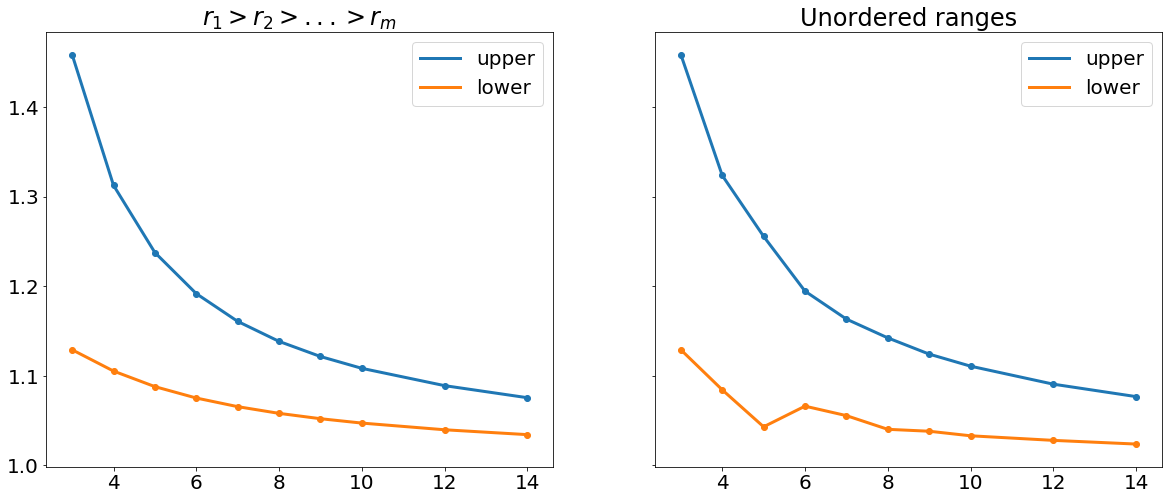

In [47]:
N = 3628800

ms = []
upper_bounds = []
lower_bounds = []

# Ordered ranges
for m in range(3, 15):
    if N % m == 0:
        upper_bound, lower_bound = get_bounds(
            np.arange(m, 0, -1), m, N // m
        )
        
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)
        ms.append(m)

fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

ax[0].plot(ms, upper_bounds, label='upper')
ax[0].scatter(ms, upper_bounds)

ax[0].plot(ms, lower_bounds, label='lower')
ax[0].scatter(ms, lower_bounds)

ax[0].legend()
ax[0].set_title(r'$r_1 > r_2 > ... > r_m$')

# Shuffled ranges
ms = []
upper_bounds = []
lower_bounds = []

for m in range(3, 15):
    if N % m == 0:
        upper_bound, lower_bound = get_bounds(
            np.arange(m, 0, -1), m, N // m, shuffle=True
        )
        
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)
        ms.append(m)

ax[1].plot(ms, upper_bounds, label='upper')
ax[1].scatter(ms, upper_bounds)

ax[1].plot(ms, lower_bounds, label='lower')
ax[1].scatter(ms, lower_bounds)

ax[1].legend()
ax[1].set_title('Unordered ranges')

plt.show()

## Geometric ranges

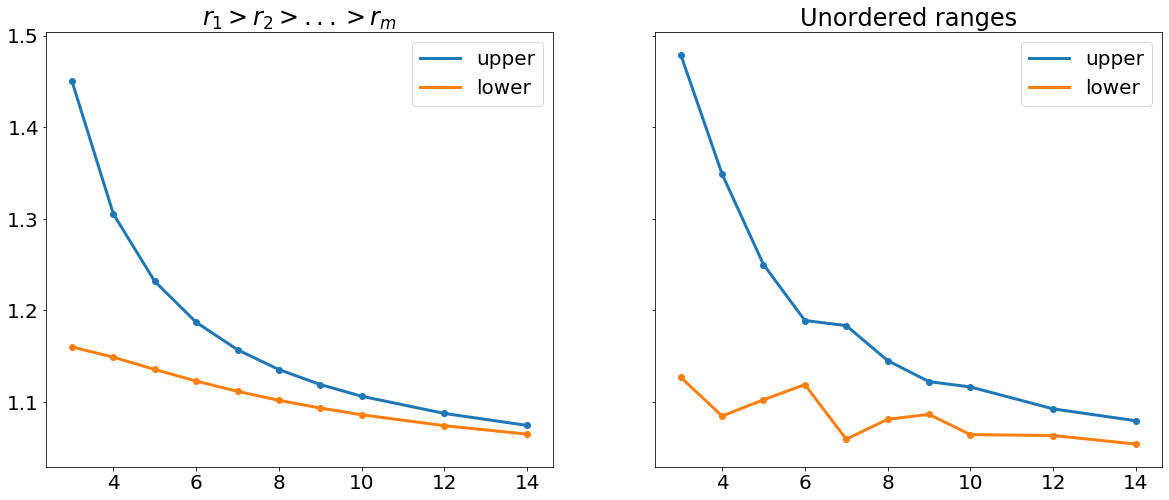

In [60]:
N = 3628800

ms = []
upper_bounds = []
lower_bounds = []

# Ordered ranges
for m in range(3, 15):
    if N % m == 0:
        upper_bound, lower_bound = get_bounds(
            2 ** np.arange(m, 0, -1), m, N // m
        )
        
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)
        ms.append(m)

fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

ax[0].plot(ms, upper_bounds, label='upper')
ax[0].scatter(ms, upper_bounds)

ax[0].plot(ms, lower_bounds, label='lower')
ax[0].scatter(ms, lower_bounds)

ax[0].legend()
ax[0].set_title(r'$r_1 > r_2 > ... > r_m$')

# Shuffled ranges
ms = []
upper_bounds = []
lower_bounds = []

for m in range(3, 15):
    if N % m == 0:
        upper_bound, lower_bound = get_bounds(
            2 ** np.arange(m, 0, -1), m, N // m, shuffle=True
        )
        
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)
        ms.append(m)

ax[1].plot(ms, upper_bounds, label='upper')
ax[1].scatter(ms, upper_bounds)

ax[1].plot(ms, lower_bounds, label='lower')
ax[1].scatter(ms, lower_bounds)

ax[1].legend()
ax[1].set_title('Unordered ranges')

plt.show()

## Some of the ranges are zero

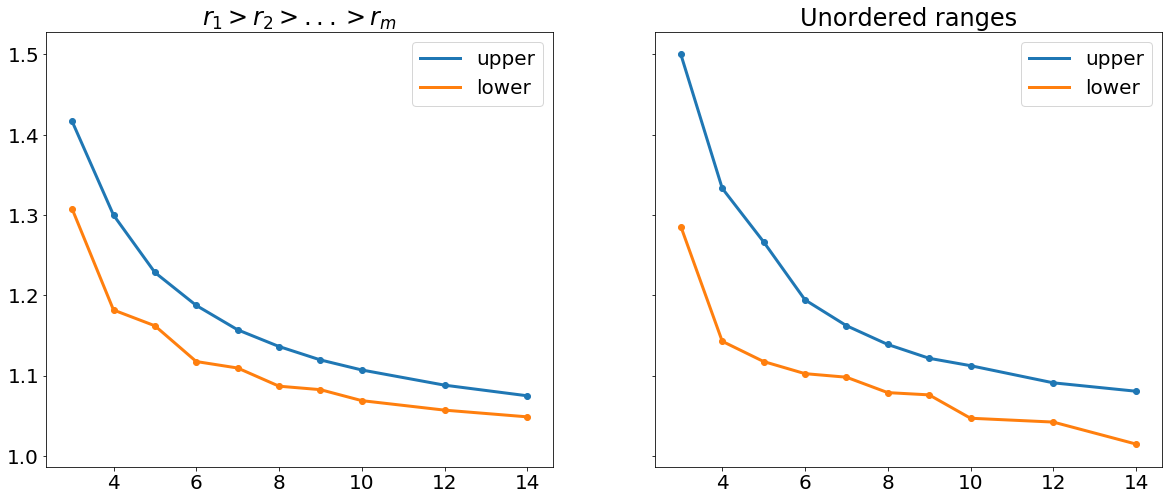

In [52]:
N = 3628800
n_non_zero_ranges = 2

ms = []
upper_bounds = []
lower_bounds = []

# Ordered ranges
for m in range(max(3, n_non_zero_ranges), 15):
    n_non_zero_ranges = m // 2
    
    if N % m == 0:
        upper_bound, lower_bound = get_bounds(
            np.array([1 / n_non_zero_ranges] * n_non_zero_ranges + [0] * (m - n_non_zero_ranges)),
            m, N // m
        )
        
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)
        ms.append(m)

fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

ax[0].plot(ms, upper_bounds, label='upper')
ax[0].scatter(ms, upper_bounds)

ax[0].plot(ms, lower_bounds, label='lower')
ax[0].scatter(ms, lower_bounds)

ax[0].legend()
ax[0].set_title(r'$r_1 > r_2 > ... > r_m$')

# Shuffled ranges
n_non_zero_ranges = 2

ms = []
upper_bounds = []
lower_bounds = []

for m in range(max(3, n_non_zero_ranges), 15):
    n_non_zero_ranges = m // 2
    
    if N % m == 0:
        upper_bound, lower_bound = get_bounds(
            np.array([1 / n_non_zero_ranges] * n_non_zero_ranges + [0] * (m - n_non_zero_ranges)),
            m, N // m, shuffle=True
        )
        
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)
        ms.append(m)

ax[1].plot(ms, upper_bounds, label='upper')
ax[1].scatter(ms, upper_bounds)

ax[1].plot(ms, lower_bounds, label='lower')
ax[1].scatter(ms, lower_bounds)

ax[1].legend()
ax[1].set_title('Unordered ranges')

plt.show()

# Different capacities

## Arithmetic ranges and capacities

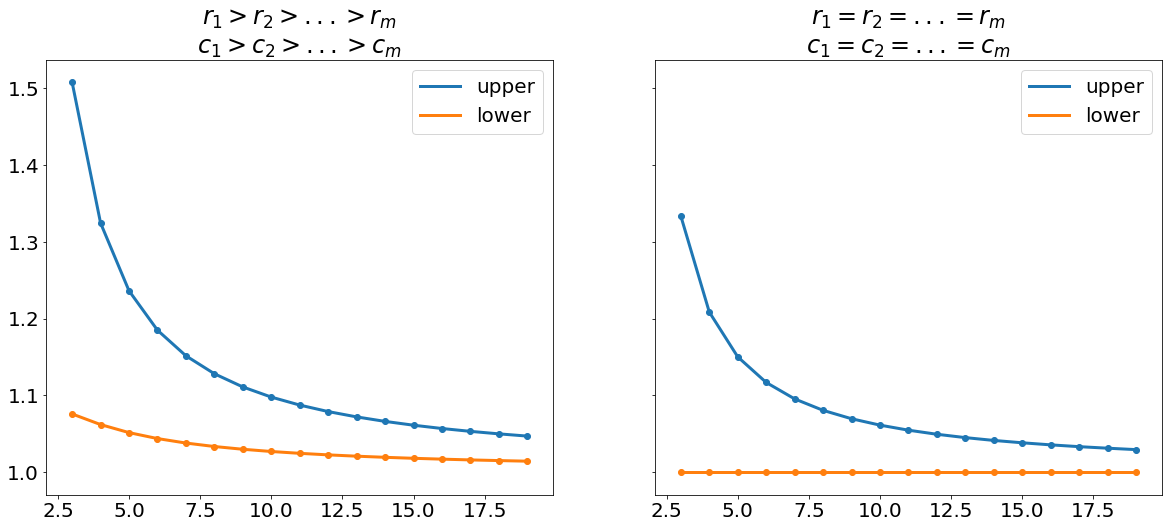

In [13]:
N = 10000

ms = []
upper_bounds = []
lower_bounds = []

# Ordered ranges
for m in range(3, 20):
    upper_bound, lower_bound = get_bounds_diff_cap(
        np.arange(m, 0, -1), m, N, np.arange(m, 0, -1)
    )

    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    ms.append(m)
    
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)
    
ax[0].plot(ms, upper_bounds, label='upper')
ax[0].scatter(ms, upper_bounds)

ax[0].plot(ms, lower_bounds, label='lower')
ax[0].scatter(ms, lower_bounds)

ax[0].legend()
ax[0].set_title(
    r'$r_1 > r_2 > ... > r_m$'
    '\n'
    r'$c_1 > c_2 > ... > c_m$'
)


ms = []
upper_bounds = []
lower_bounds = []

# Equal ranges
for m in range(3, 20):
    upper_bound, lower_bound = get_bounds_diff_cap(
        np.array([1 / m] * m), m, N, np.array([1 / m] * m)
    )

    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    ms.append(m)

ax[1].plot(ms, upper_bounds, label='upper')
ax[1].scatter(ms, upper_bounds)

ax[1].plot(ms, lower_bounds, label='lower')
ax[1].scatter(ms, lower_bounds)

ax[1].legend()
ax[1].set_title(
    r'$r_1 = r_2 = ... = r_m$'
    '\n'
    r'$c_1 = c_2 = ... = c_m$'
)
    
plt.show()

# Geometric ranges and capacities

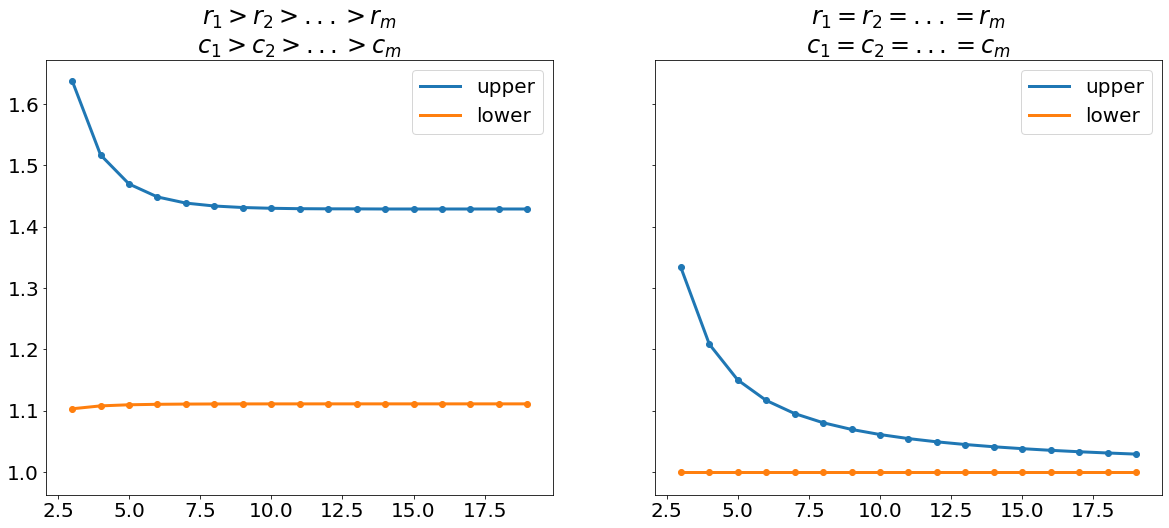

In [14]:
N = 10000

ms = []
upper_bounds = []
lower_bounds = []

# Ordered ranges
for m in range(3, 20):
    upper_bound, lower_bound = get_bounds_diff_cap(
        2 ** np.arange(m, 0, -1), m, N, 2 ** np.arange(m, 0, -1)
    )

    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    ms.append(m)
    
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)
    
ax[0].plot(ms, upper_bounds, label='upper')
ax[0].scatter(ms, upper_bounds)

ax[0].plot(ms, lower_bounds, label='lower')
ax[0].scatter(ms, lower_bounds)

ax[0].legend()
ax[0].set_title(
    r'$r_1 > r_2 > ... > r_m$'
    '\n'
    r'$c_1 > c_2 > ... > c_m$'
)


ms = []
upper_bounds = []
lower_bounds = []

# Equal ranges
for m in range(3, 20):
    upper_bound, lower_bound = get_bounds_diff_cap(
        np.array([1 / m] * m), m, N, np.array([1 / m] * m)
    )

    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    ms.append(m)

ax[1].plot(ms, upper_bounds, label='upper')
ax[1].scatter(ms, upper_bounds)

ax[1].plot(ms, lower_bounds, label='lower')
ax[1].scatter(ms, lower_bounds)

ax[1].legend()
ax[1].set_title(
    r'$r_1 = r_2 = ... = r_m$'
    '\n'
    r'$c_1 = c_2 = ... = c_m$'
)
    
plt.show()

# Comprehensive comparisons

Note: if $r_1 = r_2 = ... = r_m$, the lower bound is always 1.

## Changing the number of agents

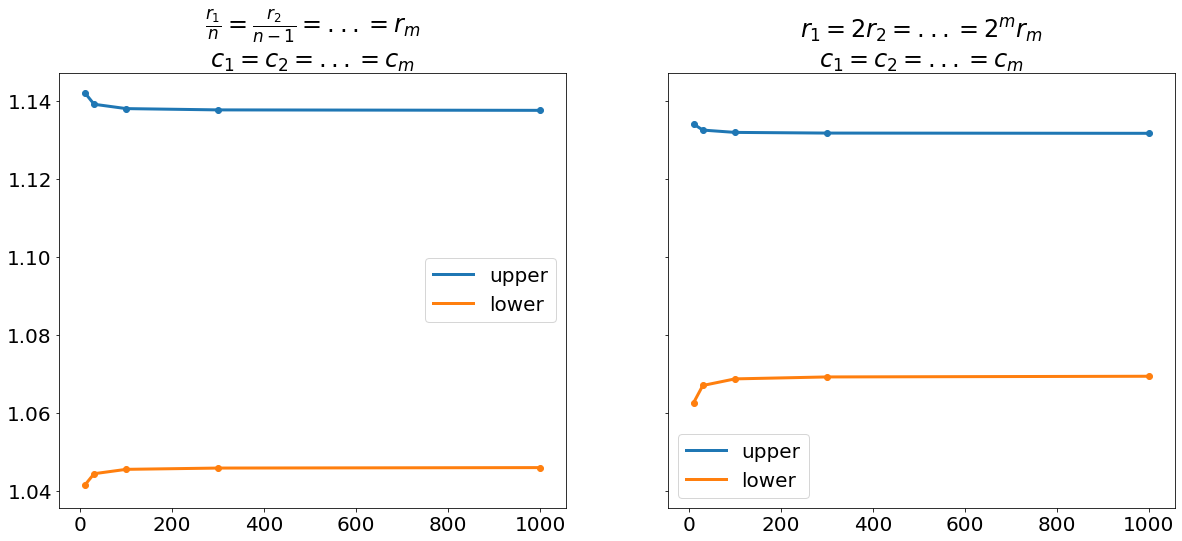

In [5]:
m = 5

ns = [10, 30, 100, 300, 1000]
upper_bounds = []
lower_bounds = []

# Arithmetic ranges
for n in ns:
    upper_bound, lower_bound = get_bounds_diff_cap(
        np.arange(m, 0, -1), m, n, np.array([1 / m] * m)
    )

    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)
    
ax[0].plot(ns, upper_bounds, label='upper')
ax[0].scatter(ns, upper_bounds)

ax[0].plot(ns, lower_bounds, label='lower')
ax[0].scatter(ns, lower_bounds)

ax[0].legend()
ax[0].set_title(
    r'$\frac{r_1}{n} = \frac{r_2}{n - 1} = ... = r_m$'
    '\n'
    r'$c_1 = c_2 = ... = c_m$'
)

# Geometric ranges
upper_bounds = []
lower_bounds = []

# Equal ranges
for n in ns:
    upper_bound, lower_bound = get_bounds_diff_cap(
        2 ** np.arange(m, 0, -1), m, n, np.array([1 / m] * m)
    )

    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)

ax[1].plot(ns, upper_bounds, label='upper')
ax[1].scatter(ns, upper_bounds)

ax[1].plot(ns, lower_bounds, label='lower')
ax[1].scatter(ns, lower_bounds)

ax[1].legend()
ax[1].set_title(
    r'$r_1 = 2r_2 = ... = 2^m r_m$'
    '\n'
    r'$c_1 = c_2 = ... = c_m$'
)
    
plt.show()

# Comprehensive graph

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


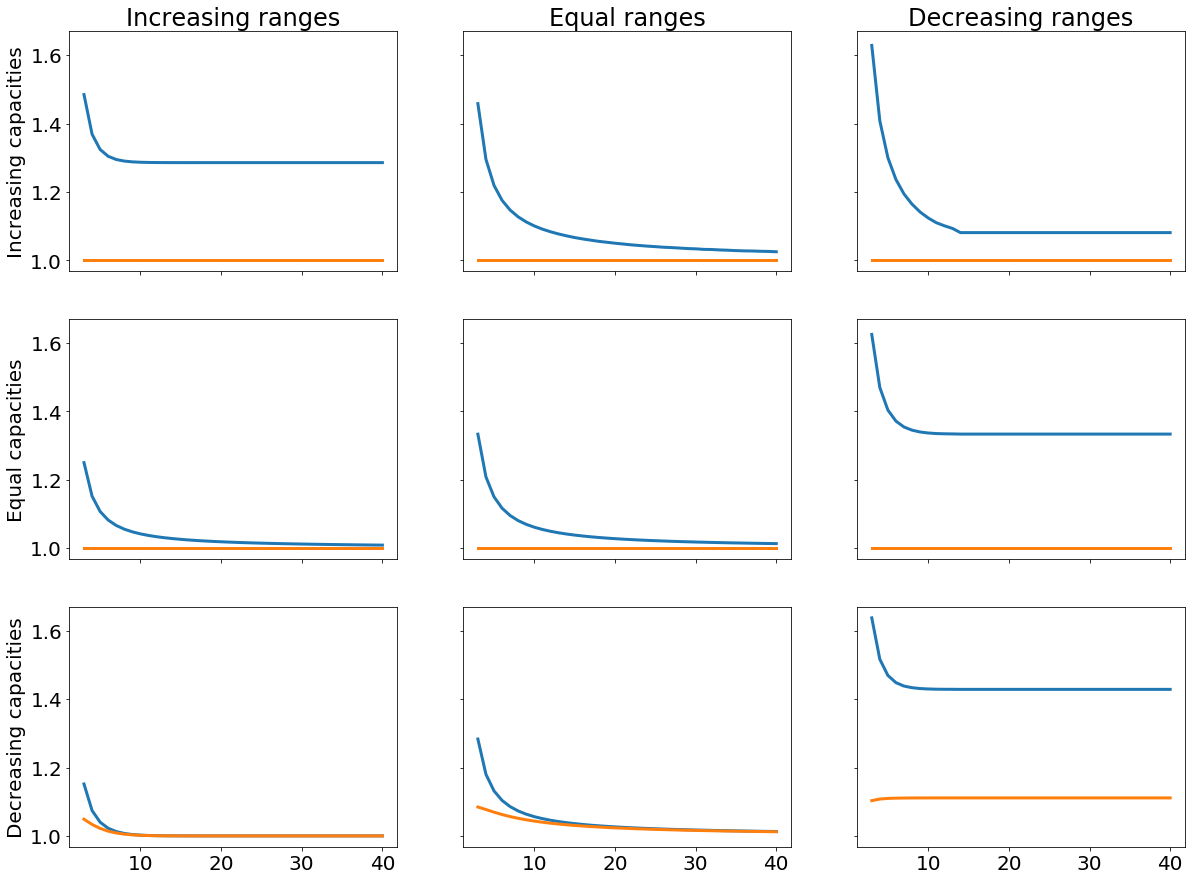

In [9]:
N = 10000
fig, ax = plt.subplots(3, 3, figsize=(20, 15), sharex=True, sharey=True)

ms = [m for m in range(3, 41)]

for i in range(3):
    for j in range(3):
        print(i, j)
        
        upper_bounds = []
        lower_bounds = []
        
        for m in ms:
            if i == 0:
                range_comb = 2 ** np.arange(1, m + 1)
            elif i == 1:
                range_comb = np.array([1 / m] * m)
            else:
                range_comb = 2 ** np.arange(m, 0, -1)
                
            if j == 0:
                capacity_comb = 2 ** np.arange(1, m + 1)
            elif j == 1:
                capacity_comb = np.array([1 / m] * m)
            else:
                capacity_comb = 2 ** np.arange(m, 0, -1)
            
            upper_bound, lower_bound = get_bounds_diff_cap(
                range_comb, m, N, capacity_comb
            )
            
            upper_bounds.append(upper_bound)
            lower_bounds.append(lower_bound)
        
        ax[i][j].plot(ms, upper_bounds)
        # ax[i][j].scatter(ms, upper_bounds)
        
        ax[i][j].plot(ms, lower_bounds)
        # ax[i][j].scatter(ms, lower_bounds)

ax[0][0].set_title('Increasing ranges')
ax[0][1].set_title('Equal ranges')
ax[0][2].set_title('Decreasing ranges')

ax[0][0].set_ylabel('Increasing capacities')
ax[1][0].set_ylabel('Equal capacities')
ax[2][0].set_ylabel('Decreasing capacities')
    
plt.show()

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


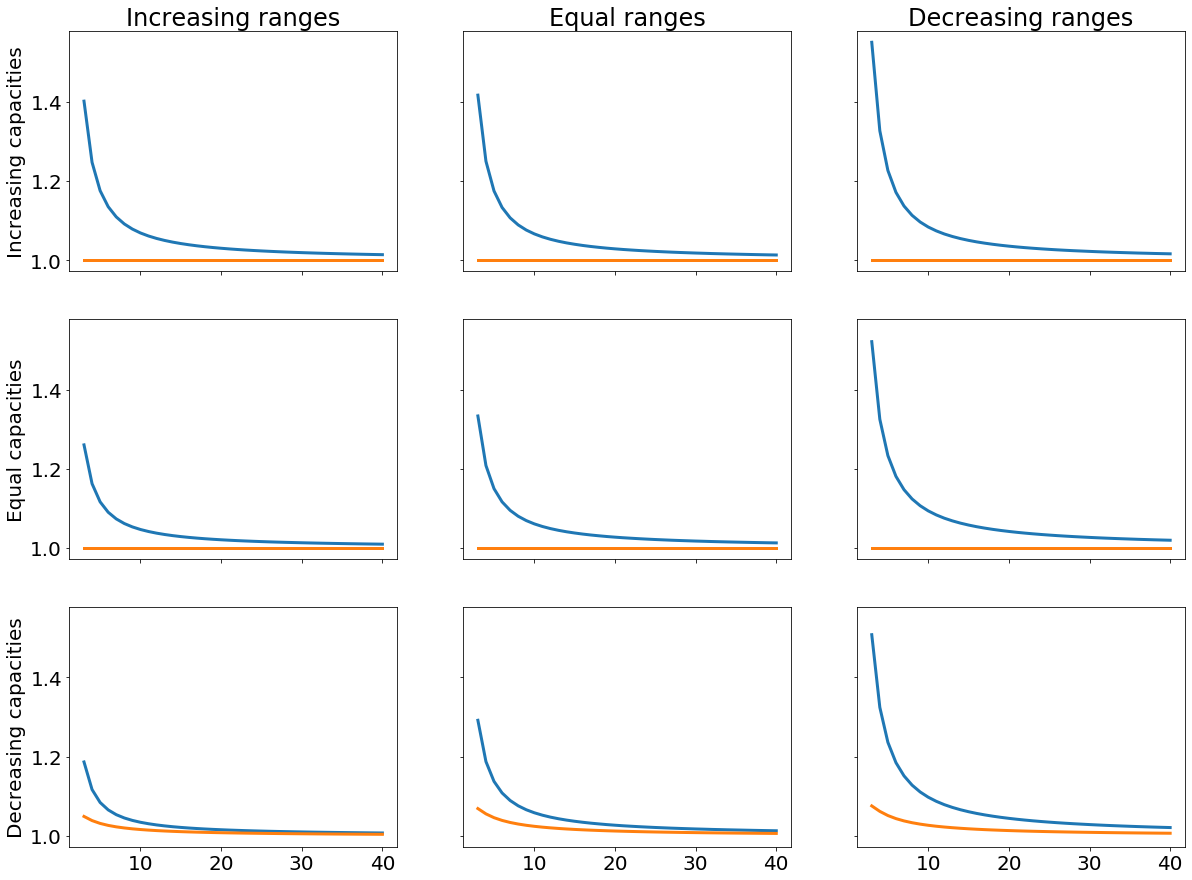

In [10]:
N = 10000
fig, ax = plt.subplots(3, 3, figsize=(20, 15), sharex=True, sharey=True)

ms = [m for m in range(3, 41)]

for i in range(3):
    for j in range(3):
        print(i, j)
        
        upper_bounds = []
        lower_bounds = []
        
        for m in ms:
            if i == 0:
                range_comb = np.arange(1, m + 1)
            elif i == 1:
                range_comb = np.array([1 / m] * m)
            else:
                range_comb = np.arange(m, 0, -1)
                
            if j == 0:
                capacity_comb = np.arange(1, m + 1)
            elif j == 1:
                capacity_comb = np.array([1 / m] * m)
            else:
                capacity_comb = np.arange(m, 0, -1)
            
            upper_bound, lower_bound = get_bounds_diff_cap(
                range_comb, m, N, capacity_comb
            )
            
            upper_bounds.append(upper_bound)
            lower_bounds.append(lower_bound)
        
        ax[i][j].plot(ms, upper_bounds)
        # ax[i][j].scatter(ms, upper_bounds)
        
        ax[i][j].plot(ms, lower_bounds)
        # ax[i][j].scatter(ms, lower_bounds)

ax[0][0].set_title('Increasing ranges')
ax[0][1].set_title('Equal ranges')
ax[0][2].set_title('Decreasing ranges')

ax[0][0].set_ylabel('Increasing capacities')
ax[1][0].set_ylabel('Equal capacities')
ax[2][0].set_ylabel('Decreasing capacities')
    
plt.show()

In [13]:
m = 10
N = 100

get_bounds_diff_cap(2 ** np.arange(1, m + 1), m, N, 2 ** np.arange(1, m + 1))

9
8
7
6
5
4
3
2
1
0


(1.2890343135944857, 1.0)